<a href="https://colab.research.google.com/github/leviaaf/ProductPlacementScheme/blob/main/Product_Placement_Scheme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Product Category Visualization.csv to Product Category Visualization.csv


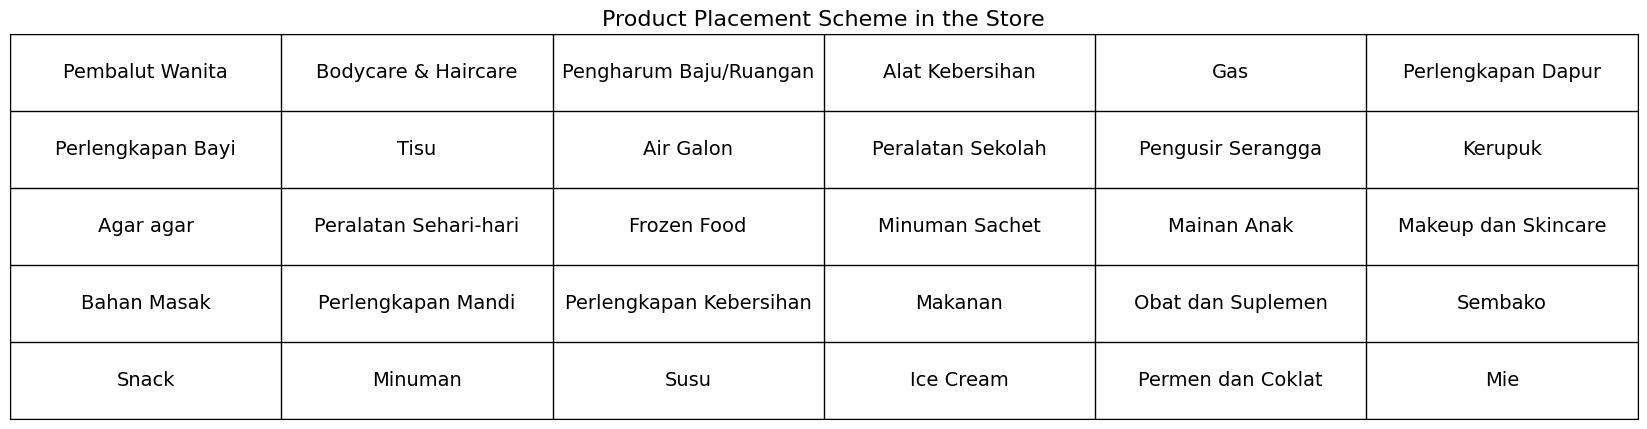

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Mengupload file "Product Category Visualization.csv"
uploaded = files.upload()

# Membaca data dari file
file_name = "Product Category Visualization.csv"
data = []
with open(file_name, "r") as file:
    lines = file.readlines()[1:]
    for line in lines:
        items = line.strip().split(";")
        item = items[0].replace('"', '')  # Menghapus tanda kutip ganda
        frequency = int(items[1])
        support = float(items[2].replace('"', ''))
        data.append((item, frequency, support))

# Menggabungkan produk duplikasi dan pisahkan produk dalam koma menjadi grid yang berbeda
merged_data = []
used_products = set()
for item, frequency, support in data:
    products = item.split(",")
    for product in products:
        product = product.strip()
        if product not in used_products:
            merged_data.append((product, frequency, support))
            used_products.add(product)

# Mengurutkan data berdasarkan frekuensi produk secara menurun, lalu berdasarkan support secara menurun
merged_data.sort(key=lambda x: (x[1], x[2]), reverse=True)

# Menghitung jumlah produk
total_products = len(merged_data)

# Menghitung jumlah baris dan kolom yang diperlukan
num_columns = int(np.ceil(np.sqrt(total_products)))
num_rows = int(np.ceil(total_products / num_columns))

# Inisialisasi array untuk menampung penempatan produk
placement = np.zeros((num_rows, num_columns), dtype=int)

# Mengisi penempatan produk berdasarkan urutan data
row, col = 0, 0
product_number = 1
product_dict = {}
for i, (product, frequency, support) in enumerate(merged_data):
    placement[row, col] = product_number  # Menandai nomor produk
    product_dict[product] = product_number
    col += 1
    if col >= num_columns:
        col = 0
        row += 1
    product_number += 1

# Mengatur ukuran grid dan produk
store_width = 21
store_height = 5
grid_width = 3.5
grid_height = 1
product_width = grid_width
product_height = grid_height

# Mengatur ukuran plot
fig_width = store_width
fig_height = store_height
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Menggambar garis pembatas antar grid
for i in range(num_rows + 1):
    y = i * grid_height
    ax.axhline(y, color='black', linestyle='-', linewidth=1)

for j in range(num_columns + 1):
    x = j * grid_width
    ax.axvline(x, color='black', linestyle='-', linewidth=1)

# Menampilkan penempatan produk
for i in range(num_rows):
    for j in range(num_columns):
        product_number = placement[i, j]
        if product_number != 0:
            product_index = product_number - 1
            product, _, _ = merged_data[product_index]
            x = j * grid_width + product_width / 2
            y = i * grid_height + product_height / 2
            ax.text(x, y, f"{product}", ha='center', va='center', fontsize=14)

# Menghapus label sumbu x dan y
ax.set_xticks([])
ax.set_yticks([])

# Menambahkan judul
ax.set_title("Product Placement Scheme in the Store", fontsize=16)

# Mengatur batas sumbu x dan y
ax.set_xlim(0, store_width)
ax.set_ylim(0, store_height)

# Menampilkan plot
plt.show()
